<a href="https://colab.research.google.com/github/AdicherlaVenkataSai/GooglecrashML/blob/master/4.%20Linear_Regression(California).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

dataset  link:
https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv


The [dataset for this exercise](https://developers.google.com/machine-learning/crash-course/california-housing-data-description) is based on 1990 census data from California. The dataset is old but still provides a great opportunity to learn about machine learning programming.

In [0]:
# import modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
# import the dataset

df = pd.read_csv(filepath_or_buffer="https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")
df.shape

(17000, 9)

In [26]:
#loot at the data

df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [27]:
#checking for missing values

df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [28]:
#datatypes 

df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
dtype: object

In [29]:
# scale the label

df['median_house_value'] /= 1000.0

df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66.9
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80.1
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85.7
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73.4
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65.5


Scaling median_house_value puts the value of each house in units of thousands. Scaling will keep loss values and learning rates in a friendlier range.

Although scaling a label is usually not essential, scaling features in a multi-feature model usually is essential.

In [30]:
# examine the dataset
#check the data
#check for missing values
#check the datatypes
#get statistics of data

df.describe()
#describe func doesnt work for categorical values
#as the dataset doesnt have its fine
# else we can use df.describe(include = 'all') even for categorical

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207.300912
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115.983764
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14.999000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119.400000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180.400000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500.001000


## Task 1: Identify anomalies in the dataset

Do you see any anomalies (strange values) in the data? 

```
# The maximum value (max) of several columns seems very
# high compared to the other quantiles. For example,
# example the total_rooms column. Given the quantile
# values (25%, 50%, and 75%), you might expect the 
# max value of total_rooms to be approximately 
# 5,000 or possibly 10,000. However, the max value 
# is actually 37,937.

# When you see anomalies in a column, become more careful
# about using that column as a feature. That said,
# anomalies in potential features sometimes mirror 
# anomalies in the label, which could make the column 
# be (or seem to be) a powerful feature.
# Also, as you will see later in the course, you 
# might be able to represent (pre-process) raw data 
# in order to make columns into useful features.
```

In [31]:
import tensorflow as tf
from tensorflow import keras
# model building
def build_model(learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential. 
  # A sequential model contains one or more layers.
  model = tf.keras.models.Sequential()
  # Describe the topography of the model.
  # The topography of a simple linear regression model
  # is a single node in a single layer. 
  model.add(tf.keras.layers.Dense(units = 1, input_shape = (1,)))
  # Compile the model topography into code that 
  # TensorFlow can efficiently execute. Configure 
  # training to minimize the model's mean squared error.
  model.compile(optimizer = tf.keras.optimizers.RMSprop(lr = learning_rate),
                loss = 'mean_squared_error',
                metrics = [tf.keras.metrics.RootMeanSquaredError()])
  return model
  
def train_model(model, df, feature, label, epochs, batch_size):
  """Train the model by feeding it data."""

  # Feed the model the feature and the label.
  # The model will train for the specified number of epochs. 
  history = model.fit(x=df[feature],
                      y=df[label],
                      batch_size=batch_size,
                      epochs=epochs)

  # Gather the trained model's weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the rest of history.
  epochs = history.epoch
  
  # Isolate the error for each epoch.
  hist = pd.DataFrame(history.history)

  # To track the progression of training, we're going to take a snapshot
  # of the model's root mean squared error at each epoch. 
  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse

print("Defined the create_model and traing_model functions.")

Defined the create_model and traing_model functions.


In [32]:
def plot_the_model(trained_weight, trained_bias, feature, label):
  """Plot the trained model against 200 random training examples."""

  # Label the axes.
  plt.xlabel(feature)
  plt.ylabel(label)

  # Create a scatter plot from 200 random points of the dataset.
  random_examples = df.sample(n=200)
  plt.scatter(random_examples[feature], random_examples[label])

  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
  x0 = 0
  y0 = trained_bias
  x1 = 10000
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')

  # Render the scatter plot and the red line.
  plt.show()


def plot_the_loss_curve(epochs, rmse):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()  

print("Defined the plot_the_model and plot_the_loss_curve functions.")

Defined the plot_the_model and plot_the_loss_curve functions.


Epoch 1/30
567/567 [==============================] - 1s 892us/step - loss: 2568618.0000 - root_mean_squared_error: 1602.6909
Epoch 2/30
567/567 [==============================] - 1s 925us/step - loss: 27971.4961 - root_mean_squared_error: 167.2468
Epoch 3/30
567/567 [==============================] - 1s 899us/step - loss: 27125.4844 - root_mean_squared_error: 164.6982
Epoch 4/30
567/567 [==============================] - 1s 889us/step - loss: 26403.1953 - root_mean_squared_error: 162.4906
Epoch 5/30
567/567 [==============================] - 0s 881us/step - loss: 25564.4258 - root_mean_squared_error: 159.8888
Epoch 6/30
567/567 [==============================] - 1s 891us/step - loss: 24941.0137 - root_mean_squared_error: 157.9272
Epoch 7/30
567/567 [==============================] - 1s 915us/step - loss: 24430.6309 - root_mean_squared_error: 156.3030
Epoch 8/30
567/567 [==============================] - 1s 897us/step - loss: 23728.5977 - root_mean_squared_error: 154.0409
Epoch 9/30
56

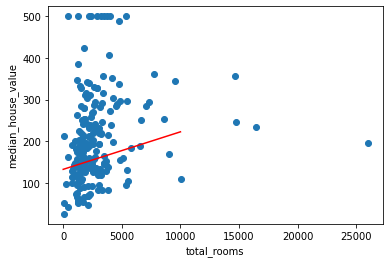

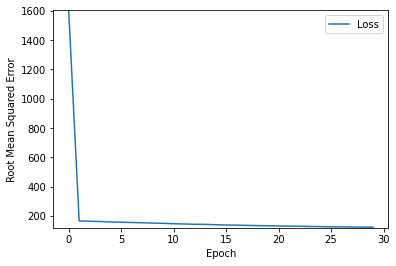

In [34]:
# The following variables are the hyperparameters.
learning_rate = 0.01
epochs = 30
batch_size = 30

# Specify the feature and the label.
feature = "total_rooms"  # the total number of rooms on a specific city block.
label="median_house_value" # the median value of a house on a specific city block.
# That is, you're going to create a model that predicts house value based 
# solely on total_rooms.  

# Discard any pre-existing version of the model.
model = None

# Invoke the functions.
model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(model, df, feature, label, epochs, batch_size)

print("\nThe learned weight for your model is %.4f" % weight)
print("The learned bias for your model is %.4f\n" % bias )

plot_the_model(weight, bias, feature, label)
plot_the_loss_curve(epochs, rmse)

## Task1: Use the model to make predictions

In [0]:

def predict_house_values(n, feature, label ):
  ''' Predict house values based on a featue '''
  # n is no of examples predictes
  # dataset has 17000 rows so 
  batch = df[feature][10000:10000 + n]
  predicted_values = model.predict_on_batch(x = batch)
  print("feature value      label value       predicted value") 
  print("                   in thousand$      in thousand$")
  print("---------------------------------------------------")

  for i in range(n):
    print('%5.0f %6.0f %15.0f' %(df[feature][10000 + i],
                                 df[label][10000 + i],
                                 predicted_values[i][0]))


In [52]:
predict_house_values(20, feature, label)

feature value      label value       predicted value
                   in thousand$      in thousand$
---------------------------------------------------
 1960     53             150
 3400     92             163
 3677     69             165
 2202     62             152
 2403     80             154
 5652    295             183
 3318    500             162
 2552    342             155
 1364    118             145
 3468    128             164
 2902    187             159
  782     80             139
 4907    112             177
 4164     95             170
 2754     69             157
 5016     90             178
 4241     54             171
 2260     68             153
 2185     71             152
 2164     73             152


## Task 2: Judge the predictive power of the model

Look at the preceding table. How close is the predicted value to the label value?  In other words, does your model accurately predict house values? 

sol:
```
# Most of the predicted values differ significantly
# from the label value, so the trained model probably 
# doesn't have much predictive power. However, the
# first 20 examples might not be representative of 
# the rest of the examples. 
```

## Task 3: Try a different feature

The `total_rooms` feature had only a little predictive power. Would a different feature have greater predictive power?  Try using `population` as the feature instead of `total_rooms`. 

Note: When you change features, you might also need to change the hyperparameters.

Epoch 1/3
142/142 [==============================] - 0s 968us/step - loss: 3390443.0000 - root_mean_squared_error: 1841.3156
Epoch 2/3
142/142 [==============================] - 0s 957us/step - loss: 3073934.2500 - root_mean_squared_error: 1753.2639
Epoch 3/3
142/142 [==============================] - 0s 935us/step - loss: 3126915.2500 - root_mean_squared_error: 1768.3086


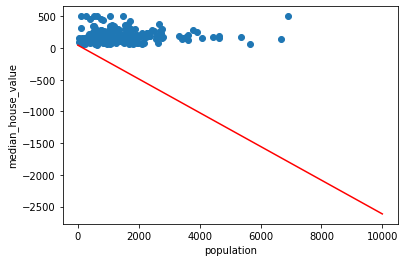

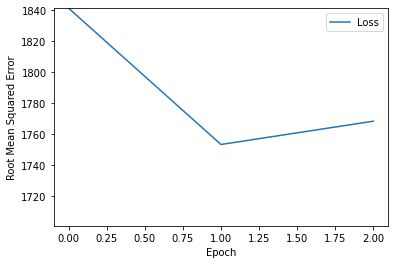

feature value      label value       predicted value
                   in thousand$      in thousand$
---------------------------------------------------
 1286     53            -299
 1867     92            -454
 2191     69            -540
 1052     62            -237
 1647     80            -395
 2312    295            -572
 1604    500            -384
 1066    342            -241
  338    118             -47
 1604    128            -384
 1200    187            -276
  292     80             -35
 2014    112            -493
 1817     95            -440
 1328     69            -310


In [54]:
feature = "population"   # Replace the ? with population or possibly
                   # a different column name.

# Experiment with the hyperparameters.
learning_rate = 2
epochs = 3
batch_size = 120

# Don't change anything below this line.
model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(model, df, 
                                         feature, label,
                                         epochs, batch_size)
plot_the_model(weight, bias, feature, label)
plot_the_loss_curve(epochs, rmse)

predict_house_values(15, feature, label)

Did `population` produce better predictions than `total_rooms`?

```
# Training is not entirely deterministic, but population 
# typically converges at a slightly higher RMSE than 
# total_rooms.  So, population appears to be about 
# the same or slightly worse at making predictions 
# than total_rooms.
```

## Task 4: Define a synthetic feature

1.   List item
2.   List item



You have determined that `total_rooms` and `population` were not useful features.  That is, neither the total number of rooms in a neighborhood nor the neighborhood's population successfully predicted the median house price of that neighborhood. Perhaps though, the *ratio* of `total_rooms` to `population` might have some predictive power. That is, perhaps block density relates to median house value.

To explore this hypothesis, do the following: 

1. Create a [synthetic feature](https://developers.google.com/machine-learning/glossary/#synthetic_feature) that's a ratio of `total_rooms` to `population`. (If you are new to pandas DataFrames, please study the [Pandas DataFrame Ultraquick Tutorial](https://colab.research.google.com/github/google/eng-edu/blob/master/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb?utm_source=linearregressionreal-colab&utm_medium=colab&utm_campaign=colab-external&utm_content=pandas_tf2-colab&hl=en).)
2. Tune the three hyperparameters.
3. Determine whether this synthetic feature produces 
   a lower loss value than any of the single features you 
   tried earlier in this exercise.

Epoch 1/24
567/567 [==============================] - 1s 902us/step - loss: 38492.8438 - root_mean_squared_error: 196.1959
Epoch 2/24
567/567 [==============================] - 1s 916us/step - loss: 18976.4863 - root_mean_squared_error: 137.7552
Epoch 3/24
567/567 [==============================] - 1s 908us/step - loss: 15087.8096 - root_mean_squared_error: 122.8324
Epoch 4/24
567/567 [==============================] - 1s 896us/step - loss: 14916.7920 - root_mean_squared_error: 122.1343
Epoch 5/24
567/567 [==============================] - 1s 912us/step - loss: 14655.4062 - root_mean_squared_error: 121.0595
Epoch 6/24
567/567 [==============================] - 1s 887us/step - loss: 14520.3594 - root_mean_squared_error: 120.5005
Epoch 7/24
567/567 [==============================] - 1s 905us/step - loss: 14355.7559 - root_mean_squared_error: 119.8155
Epoch 8/24
567/567 [==============================] - 1s 906us/step - loss: 14238.1250 - root_mean_squared_error: 119.3236
Epoch 9/24
567/5

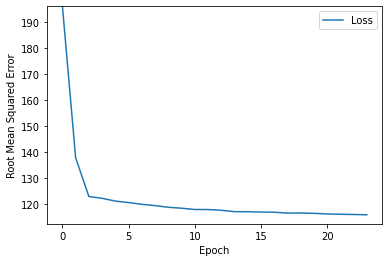

feature value      label value       predicted value
                   in thousand$      in thousand$
---------------------------------------------------
    2     53             188
    2     92             200
    2     69             195
    2     62             211
    1     80             186
    2    295             225
    2    500             210
    2    342             223
    4    118             288
    2    128             214
    2    187             224
    3     80             234
    2    112             225
    2     95             219
    2     69             210


In [55]:
# Define a synthetic feature
df["rooms_per_person"] = df["total_rooms"] / df["population"]
feature = "rooms_per_person"

# Tune the hyperparameters.
learning_rate = 0.06
epochs = 24
batch_size = 30

# Don't change anything below this line.
model = build_model(learning_rate)
weight, bias, epochs, mae = train_model(model, df,
                                        feature, label,
                                        epochs, batch_size)

plot_the_loss_curve(epochs, mae)
predict_house_values(15, feature, label)

Based on the loss values, this synthetic feature produces a better model than the individual features you tried in Task 2 and Task 3. However, the model still isn't creating great predictions.

## Task 5. Find feature(s) whose raw values correlate with the label

So far, we've relied on trial-and-error to identify possible features for the model.  Let's rely on statistics instead.

A **correlation matrix** indicates how each attribute's raw values relate to the other attributes' raw values. Correlation values have the following meanings:

  * `1.0`: perfect positive correlation; that is, when one attribute rises, the other attribute rises.
  * `-1.0`: perfect negative correlation; that is, when one attribute rises, the other attribute falls. 
  * `0.0`: no correlation; the two column's [are not linearly related](https://en.wikipedia.org/wiki/Correlation_and_dependence#/media/File:Correlation_examples2.svg).

In general, the higher the absolute value of a correlation value, the greater its predictive power. For example, a correlation value of -0.8 implies far more predictive power than a correlation of -0.2.

In [56]:
# generate correlation matrix

df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_person
longitude,1.000000,-0.925208,-0.114250,0.047010,0.071802,0.101674,0.059628,-0.015485,-0.044982,-0.077773
latitude,-0.925208,1.000000,0.016454,-0.038773,-0.069373,-0.111261,-0.074902,-0.080303,-0.144917,0.143017
housing_median_age,-0.114250,0.016454,1.000000,-0.360984,-0.320434,-0.295890,-0.302754,-0.115932,0.106758,-0.103655
total_rooms,0.047010,-0.038773,-0.360984,1.000000,0.928403,0.860170,0.919018,0.195383,0.130991,0.121001
total_bedrooms,0.071802,-0.069373,-0.320434,0.928403,1.000000,0.881169,0.980920,-0.013495,0.045783,0.047811
population,0.101674,-0.111261,-0.295890,0.860170,0.881169,1.000000,0.909247,-0.000638,-0.027850,-0.140277
households,0.059628,-0.074902,-0.302754,0.919018,0.980920,0.909247,1.000000,0.007644,0.061031,-0.034049
median_income,-0.015485,-0.080303,-0.115932,0.195383,-0.013495,-0.000638,0.007644,1.000000,0.691871,0.232667
median_house_value,-0.044982,-0.144917,0.106758,0.130991,0.045783,-0.027850,0.061031,0.691871,1.000000,0.206969
rooms_per_person,-0.077773,0.143017,-0.103655,0.121001,0.047811,-0.140277,-0.034049,0.232667,0.206969,1.000000


A strong negative correlation or strong positive correlation with the label suggests a potentially good feature.

**Your Task:** Determine which of the nine potential features appears to be the best candidate for a feature?

```
# The `median_income` correlates 0.7 with the label 
# (median_house_value), so median_income` might be a 
# good feature. The other seven potential features
# all have a correlation relatively close to 0. 
# If time permits, try median_income as the feature
# and see whether the model improves

```

**Note:** Using `median_income` as a feature may raise some ethical and fairness
issues